In [10]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv('/Users/rohanjairam/projects/saas-user-analytics/data/eda_ready.csv')

# Clean column names (remove spaces)
df.columns = df.columns.str.strip()

# Encode 'Churn' column
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Drop unnecessary ID column
df = df.drop('customerID', axis=1)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)



In [11]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/Users/rohanjairam/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/rohanjairam/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/rohanjairam/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [14]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/09/c9/5f0be8e51d55df60a1bd7d09e7b05380e04c38de9554105f6cacffac3886/xgboost-3.0.2-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/Users/rohanjairam/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:09:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [16]:
y_pred = model.predict(X_test)

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1033
           1       0.57      0.49      0.52       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.68      1407
weighted avg       0.76      0.77      0.76      1407



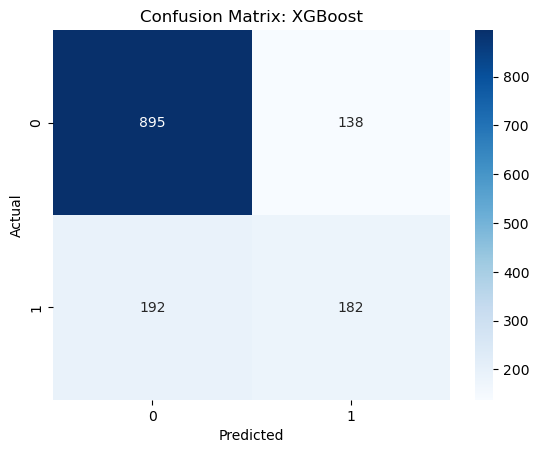

In [20]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

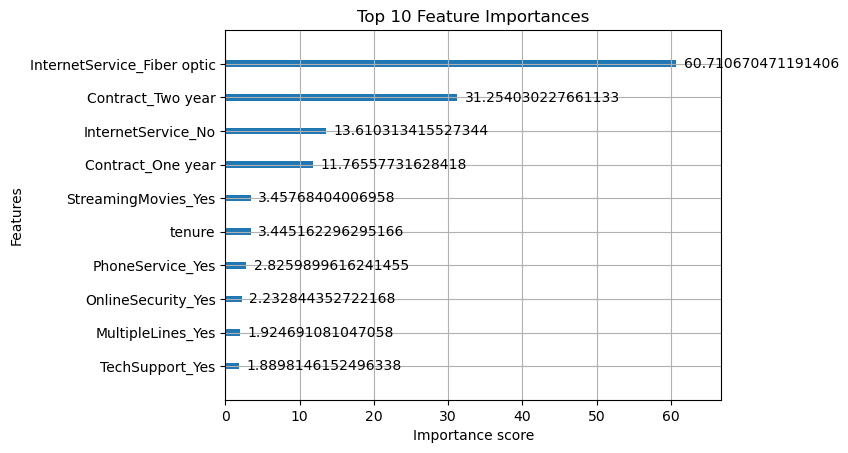

In [21]:
import matplotlib.pyplot as plt

xgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances")
plt.show()

## Model Summary (XGBoost)

- Accuracy: ~77% (based on output)
- Handles missing values without imputation
- Top drivers of churn identified via feature importance:
  - Tenure
  - Monthly Charges
  - Contract Type
